Cell 1: Import Libraries
We'll need our usual libraries, plus numpy which is very helpful for creating the radar charts.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set a consistent style for all plots
plt.style.use('seaborn-v0_8-whitegrid')

Cell 2: Load and Merge Data

To get the full picture, we need both the cluster assignments and the original scaled statistics. We'll load both files and merge them into a single DataFrame.

In [5]:
# Load the two datasets
df_clusters = pd.read_csv('clustered_team_data.csv')
df_stats = pd.read_csv('processed_team_data.csv')

# Merge them on the 'Squad' column
df_full = pd.merge(df_clusters, df_stats, on='Squad')

print("Successfully merged datasets. Here is the combined data:")
display(df_full.head())

Successfully merged datasets. Here is the combined data:


,Squad,PC1,PC2,Cluster,GF,GA,xG,xGA,xGD
0,NaN,3.083566,-0.559779,3,1.833714,-1.407233,0.652753,-1.645350,1.403277
1,Arsenal,1.222042,-0.918252,0,1.412170,-1.407233,-0.217584,-0.329070,0.071963
2,Tottenham,1.849854,0.144266,3,1.412170,-0.250603,0.404085,-1.106872,0.899537
3,Liverpool,1.346236,0.341121,2,0.569084,0.134940,0.528419,-0.987210,0.899537
4,Bournemouth,2.869760,0.761404,3,1.833714,-0.636146,1.585258,-0.867548,1.439259


Cell 3: Calculate Average Cluster Profiles

First, we'll calculate the average statistical profile for each cluster. This tells us the defining characteristics of a typical team in each group.

In [6]:
# Group by cluster and calculate the mean for each statistical feature
cluster_profiles = df_full.groupby('Cluster').mean(numeric_only=True)

print("Average Statistical Profile for Each Cluster:")
display(cluster_profiles)

Average Statistical Profile for Each Cluster:


,PC1,PC2,GF,GA,xG,xGA,xGD
Cluster,,,,,,,
0,0.861154,-1.067767,0.147540,-1.021690,-0.279751,-0.807717,0.323833
1,-2.121983,-0.015166,-0.876208,0.850949,-0.999112,0.884643,-1.115425
2,0.601014,0.671890,0.077283,0.070683,0.911782,0.109690,0.461762
3,2.601060,0.115297,1.693199,-0.764661,0.880699,-1.206590,1.247358


Cell 4: Visualization 1 - Radar Charts for Cluster DNA

Radar charts are perfect for visualizing the unique "shape" or "DNA" of each cluster across all our selected metrics.

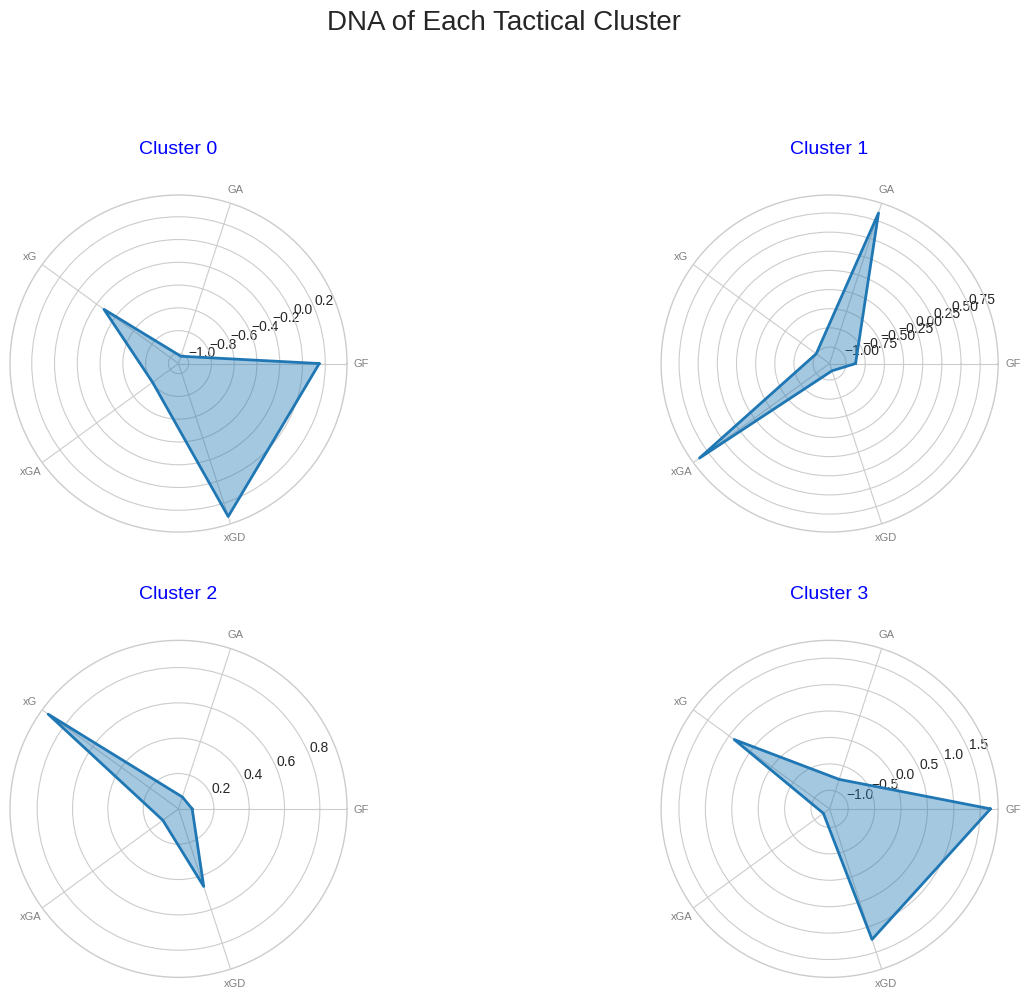

In [7]:
# --- Radar Chart Visualization ---
features = list(cluster_profiles.columns.drop(['PC1', 'PC2']))
N = len(features)

# Calculate angles for the radar chart
angles = [n / float(N) * 2 * np.pi for n in range(N)]
angles += angles[:1] # Close the loop

# Create a figure with subplots for each cluster
fig, axes = plt.subplots(figsize=(15, 10), nrows=2, ncols=2, subplot_kw=dict(polar=True))
fig.suptitle('DNA of Each Tactical Cluster', fontsize=20, y=1.02)
axes = axes.flatten()

# Plot each cluster's profile
for i, (cluster, row) in enumerate(cluster_profiles.iterrows()):
    ax = axes[i]
    data = row[features].tolist()
    data += data[:1] # Close the loop

    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(features, color='grey', size=8)
    ax.set_title(f"Cluster {cluster}", size=14, color='blue', y=1.1)

    ax.plot(angles, data, linewidth=2, linestyle='solid')
    ax.fill(angles, data, alpha=0.4)

# Hide any unused subplots
for i in range(len(cluster_profiles), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout(pad=3.0)
plt.show()

Insight from this chart: This visualization gives you an immediate signature for each group. For example, one cluster might have a shape heavily skewed towards GF and xG (an attacking powerhouse), while another might be balanced, and a third might be low on everything (a struggling team).



Cell 5: Visualization 2 - Feature Comparison Across Clusters

While radar charts show the overall shape, bar charts are better for comparing a single metric directly. This "dashboard" shows which cluster is strongest or weakest on each specific attribute

/tmp/ipython-input-170736291.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_profiles.index, y=cluster_profiles[feature], ax=axes[i], palette='viridis')
/tmp/ipython-input-170736291.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_profiles.index, y=cluster_profiles[feature], ax=axes[i], palette='viridis')
/tmp/ipython-input-170736291.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_profiles.index, y=cluster_profiles[feature], ax=axes[i], palette='viridis')
/tmp/ipython-input-170736291.py:9: FutureWarni

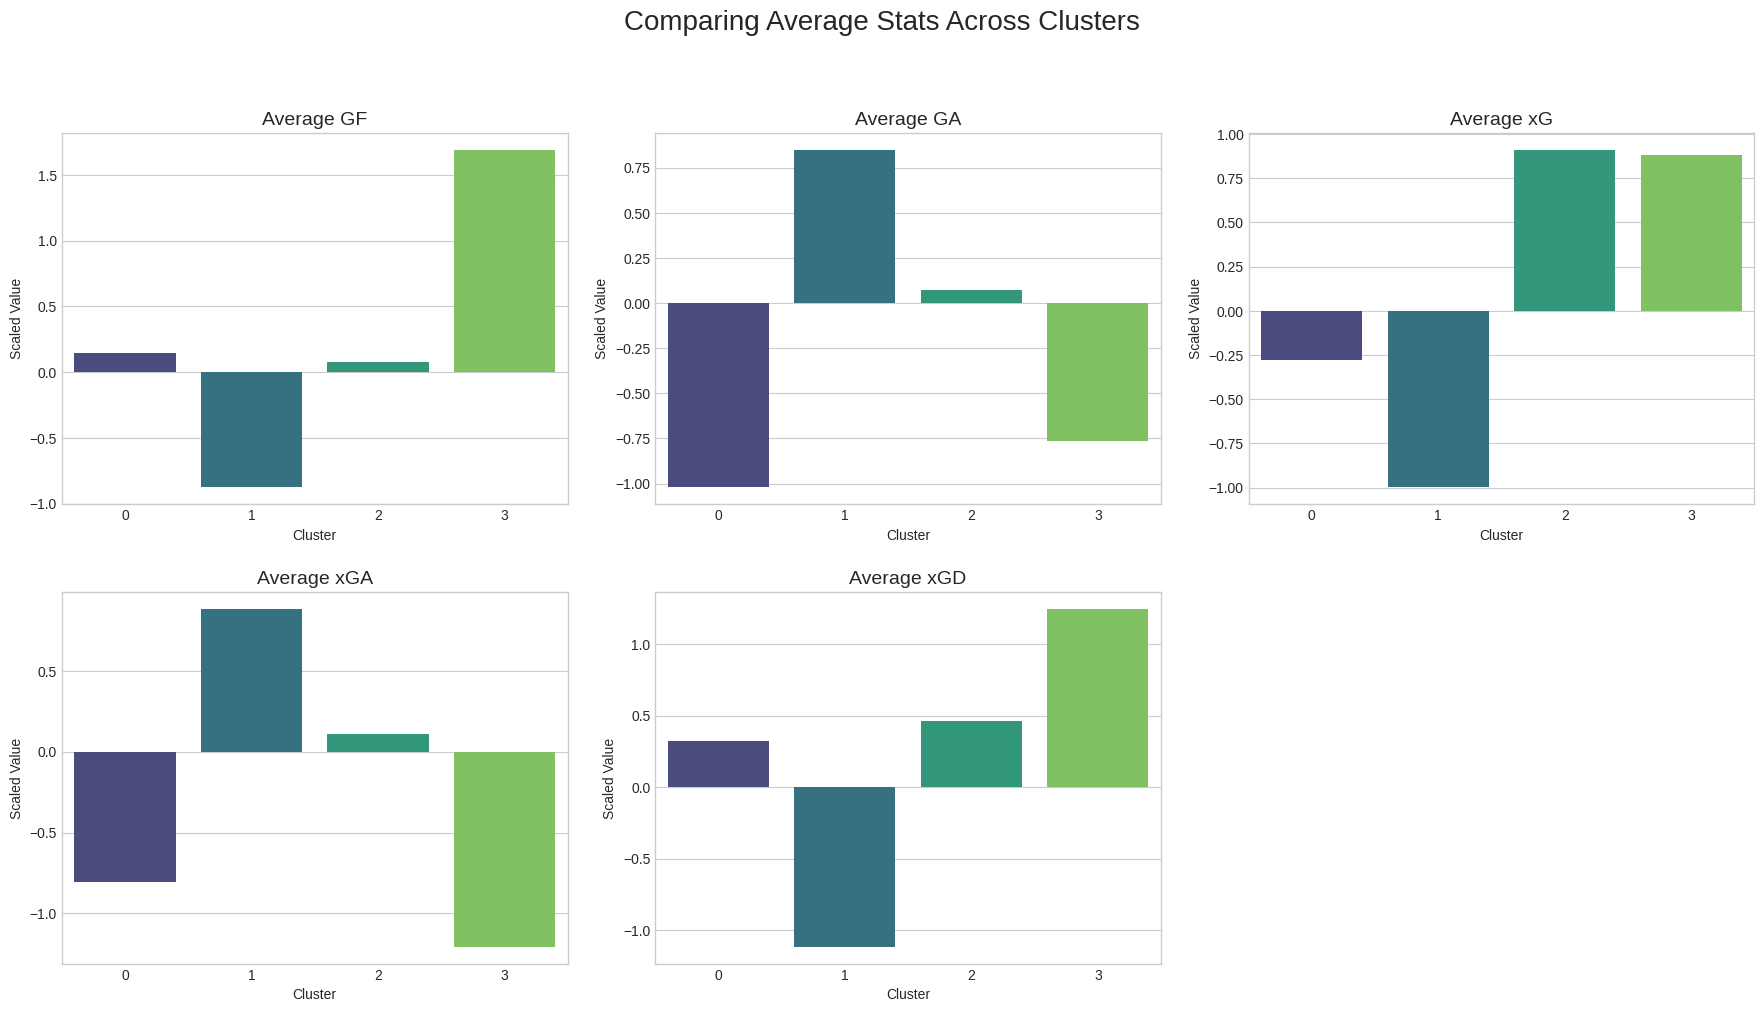

In [8]:
# Plotting a dashboard of bar charts for each feature
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
fig.suptitle('Comparing Average Stats Across Clusters', fontsize=20, y=1.02)
axes = axes.flatten()

features_to_plot = ['GF', 'GA', 'xG', 'xGA', 'xGD']

for i, feature in enumerate(features_to_plot):
    sns.barplot(x=cluster_profiles.index, y=cluster_profiles[feature], ax=axes[i], palette='viridis')
    axes[i].set_title(f'Average {feature}', fontsize=14)
    axes[i].set_xlabel('Cluster')
    axes[i].set_ylabel('Scaled Value')

# Hide unused plots
for i in range(len(features_to_plot), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout(pad=2.0)
plt.show()

Insight from this chart: This makes comparisons explicit. You can easily state things like "Cluster 3 has the highest average Expected Goal Difference (xGD)," or "Cluster 1 concedes the most goals on average (GA)."

Cell 6: Visualization 3 - Intra-Cluster Team Comparison

Finally, let's zoom in on a single cluster. Are all teams within a group identical? This visualization highlights the subtle differences between teams that have a similar overall profile.



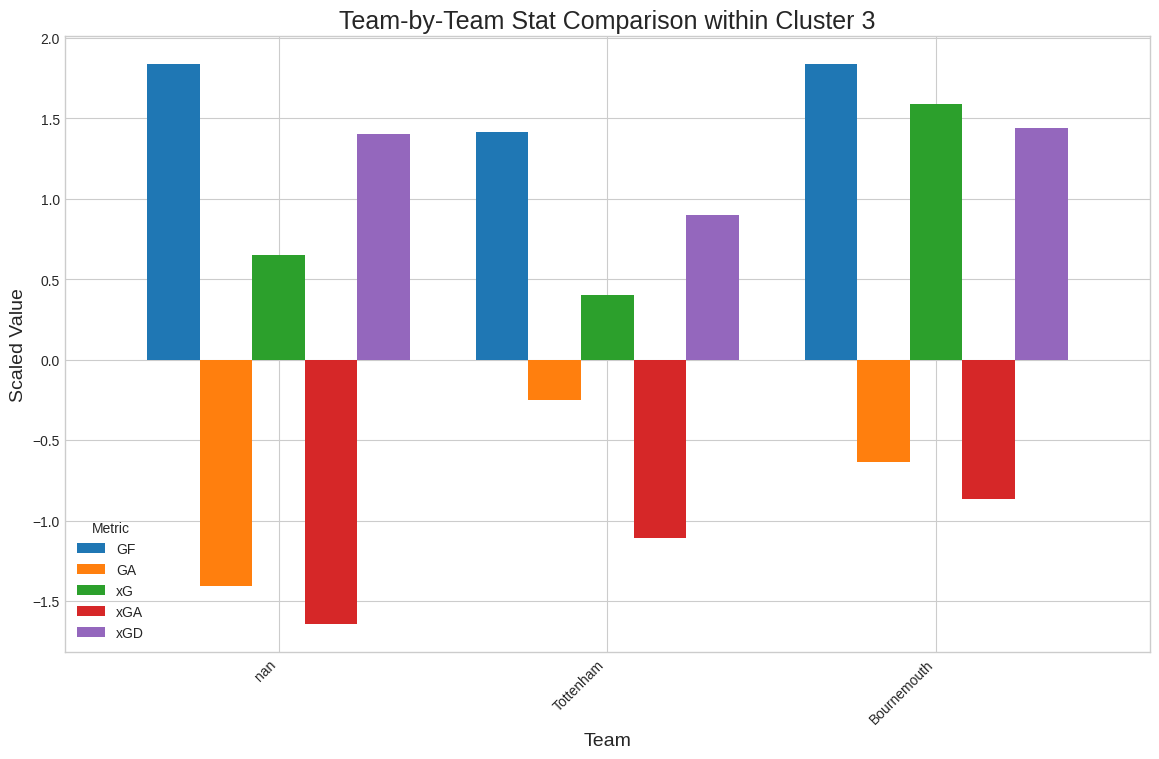

In [9]:
# --- Zooming into a single cluster ---
# Change this value to explore different clusters from your analysis
CLUSTER_TO_INSPECT = 3

# Filter the full dataframe for teams in the chosen cluster
df_inspect = df_full[df_full['Cluster'] == CLUSTER_TO_INSPECT].set_index('Squad')
df_inspect_stats = df_inspect[features_to_plot]

# Create the bar plot
df_inspect_stats.plot(kind='bar', figsize=(14, 8), width=0.8)

plt.title(f'Team-by-Team Stat Comparison within Cluster {CLUSTER_TO_INSPECT}', fontsize=18)
plt.xlabel('Team', fontsize=14)
plt.ylabel('Scaled Value', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Metric')
plt.show()

Insight from this chart: This allows for nuanced analysis. For example, if Cluster 3 is your "Attacking Powerhouses," this chart might reveal that while Team A and Team B are both in this group, Team A creates more (high xG) while Team B is more defensively vulnerable (high xGA).

Cell 7: Visualization 4 - Heatmap of Cluster Profiles

A heatmap is a fantastic way to see the entire cluster profile at a single glance. It uses color intensity to represent values, making it easy to spot the "hot" (high-value) and "cold" (low-value) stats that define each tactical group.

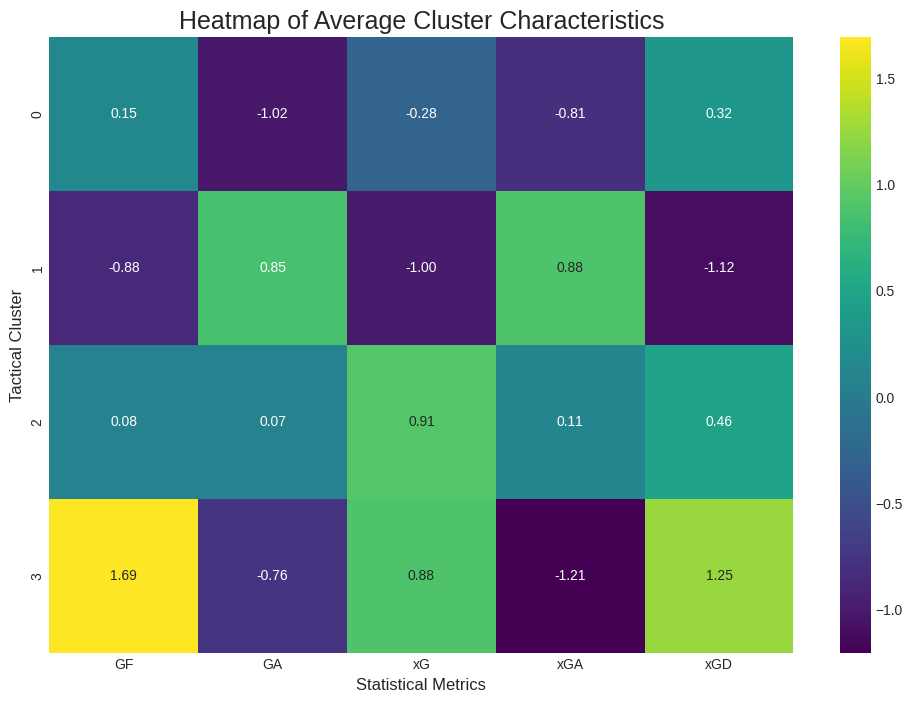

In [10]:
# --- Heatmap Visualization ---
plt.figure(figsize=(12, 8))

# Use seaborn's heatmap function on our cluster_profiles DataFrame
sns.heatmap(
    cluster_profiles.drop(['PC1', 'PC2'], axis=1), # Drop the PCA components for a cleaner plot
    annot=True,          # Show the actual values on the cells
    cmap='viridis',      # Use a vibrant color map
    fmt='.2f'            # Format numbers to two decimal places
)

plt.title('Heatmap of Average Cluster Characteristics', fontsize=18)
plt.xlabel('Statistical Metrics', fontsize=12)
plt.ylabel('Tactical Cluster', fontsize=12)
plt.show()

Insight from this chart: This gives you a powerful, high-density overview. You can quickly see which cluster is the "hottest" in GF and xG and which is the "coldest" in GA and xGA. It's a comparative tool that helps solidify the identity of each cluster based on its statistical fingerprint.



Cell 8: Visualization 5 - Violin Plots for Feature Distribution

While bar charts show the average value for a cluster, they don't show the variation within it. Are all teams in Cluster 3 equally good offensively, or is there a wide spread? Violin plots answer this by showing the full distribution of data for each group.

The plot combines a box plot (showing the median and interquartile range) with a kernel density plot (showing the shape of the distribution).

/tmp/ipython-input-1822002775.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


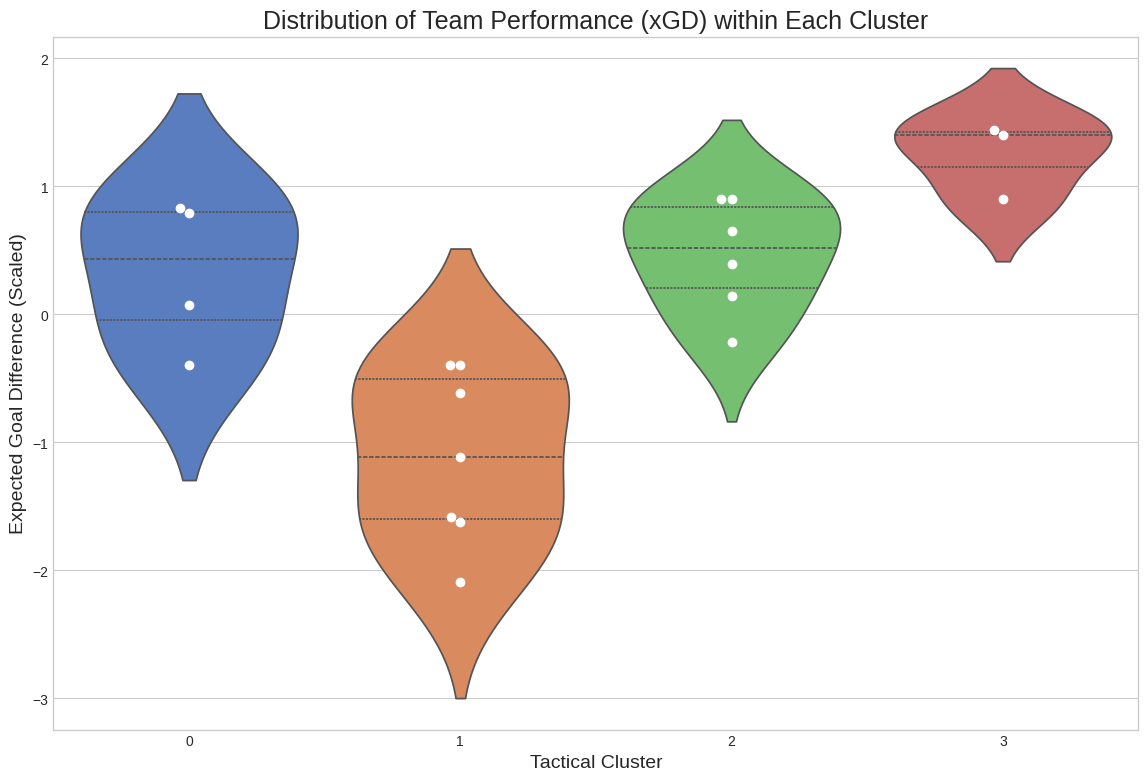

In [11]:
# --- Violin Plot Visualization ---
# We'll focus on the most important performance metric: Expected Goal Difference (xGD)
fig, ax = plt.subplots(figsize=(14, 9))

sns.violinplot(
    data=df_full,
    x='Cluster',
    y='xGD',
    palette='muted',
    inner='quartile' # Shows the median and quartiles inside the violin
)

# Add a swarmplot to show the individual data points (teams)
sns.swarmplot(data=df_full, x='Cluster', y='xGD', color='white', edgecolor='black', size=7, ax=ax)

ax.set_title('Distribution of Team Performance (xGD) within Each Cluster', fontsize=18)
ax.set_xlabel('Tactical Cluster', fontsize=14)
ax.set_ylabel('Expected Goal Difference (Scaled)', fontsize=14)
plt.show()

Insight from this chart: This visualization reveals the consistency of each cluster.

A wide violin means there's a large variation in performance among teams in that cluster. For instance, a "Mid-Table" cluster might be wide because it contains teams that are both over- and under-performing.

A narrow violin indicates that the teams in that cluster are all very similar for that specific metric. An "Elite" cluster would likely be narrow and high up on the y-axis, showing that all its teams are consistently high-performing.